In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# def String2List(coeff_pred_prob):
#     tmp = coeff_pred_prob.replace(" ",",").split("\n,") # .split("[[")[1].split("]]")[0]
#     tmp[0] = tmp[0].replace("[[","[")
#     tmp[-1] = tmp[-1].replace("]]","]")
#     return [eval(var) for var in tmp]

def String2List(coeff_pred_prob):
    tmp = coeff_pred_prob.replace(" ",",").replace(",,,",",").replace(",,",",").replace(",,",",").replace("]\n,","]hoge")
    tmp = tmp.replace(",]","]").replace("[[","[").replace("]]","]").replace("[,","[").replace("\n,",",").split("hoge")
    return [eval(var) for var in tmp]

In [3]:
os.chdir("C:/Users/Mitsu/Desktop/AISTATS/")
method_list = ["baseline", "ablation", "L1", "L2"]
method = method_list[0]

In [4]:
####### MMHC ##############
tmp = pd.DataFrame({})
for i in range(2,5): # 2,3,4
    df = pd.read_csv("230930_MMHC/Results_MMHC_"+str(i)+".csv",sep=",",encoding="utf-8")
    del df["Unnamed: 0"]
    tmp = pd.concat([tmp, df])

df = tmp
coeff_pred_prob_list, coeff_result_mean_list, coeff_result_std_list = [],[],[]
for num_of_var in range(2, len(df)+2):
    coeff_pred_prob = df[df["Num_of_var"]==num_of_var]["Coeff_result_probability"].values[0]
    coeff_pred_prob = String2List(coeff_pred_prob)
    coeff_pred_prob_list.append(coeff_pred_prob)

    coeff_result_mean = df[df["Num_of_var"]==num_of_var]["Coeff_Truth"].values[0]
    coeff_result_mean = String2List(coeff_result_mean)
    coeff_result_mean_list.append(coeff_result_mean)

df["Coeff_result_probability"] = coeff_pred_prob_list
df["Coeff_Truth"] = coeff_result_mean_list

df_MMHC = df.copy()

In [5]:
os.chdir("C:/Users/Mitsu/Desktop/AISTATS/")
method_list = ["baseline", "ablation", "L1", "L2"]
SIMPLE, CONDI, GAN, VARLINGAM = dict(),dict(),dict(),dict()
for method in method_list:
    ####### PELC(SimpleNN) #############
    df = pd.read_csv("230929_SimpleNN_Without_Conditional/"+method+"/Results.csv",sep=",",encoding="utf-8")
    del df["Unnamed: 0"]
    coeff_pred_prob_list, coeff_result_mean_list, coeff_result_std_list = [],[],[]
    for num_of_var in range(2, len(df)+2):
        coeff_pred_prob = df[df["Num_of_var"]==num_of_var]["Coeff_result_probability"].values[0]
        coeff_pred_prob = String2List(coeff_pred_prob)
        coeff_pred_prob_list.append(coeff_pred_prob)

        coeff_result_mean = df[df["Num_of_var"]==num_of_var]["Coeff_result_mean"].values[0]
        coeff_result_mean = String2List(coeff_result_mean)
        coeff_result_mean_list.append(coeff_result_mean)

        coeff_result_std = df[df["Num_of_var"]==num_of_var]["Coeff_result_std"].values[0]
        coeff_result_std = String2List(coeff_result_std)
        coeff_result_std_list.append(coeff_result_std)

    df["Coeff_result_probability"] = coeff_pred_prob_list
    df["Coeff_result_mean"] = coeff_result_mean_list
    df["Coeff_result_std"] = coeff_result_std_list
    df_PELC_SimpleNN = df.copy()

    ####### PELC(ConditionalNN) ##############
    df = pd.read_csv("230929_02/"+method+"/Results.csv",sep=",",encoding="utf-8")
    del df["Unnamed: 0"]
    coeff_pred_prob_list, coeff_result_mean_list, coeff_result_std_list = [],[],[]
    Time_list = []
    for num_of_var in range(2, len(df)+2):
        coeff_pred_prob = df[df["Num_of_var"]==num_of_var]["Coeff_result_probability"].values[0]
        coeff_pred_prob = String2List(coeff_pred_prob)
        coeff_pred_prob_list.append(coeff_pred_prob)

        coeff_result_mean = df[df["Num_of_var"]==num_of_var]["Coeff_result_mean"].values[0]
        coeff_result_mean = String2List(coeff_result_mean)
        coeff_result_mean_list.append(coeff_result_mean)

        coeff_result_std = df[df["Num_of_var"]==num_of_var]["Coeff_result_std"].values[0]
        coeff_result_std = String2List(coeff_result_std)
        coeff_result_std_list.append(coeff_result_std)

        time = df[df["Num_of_var"]==num_of_var]["Time"].values[0]
        time = time * 10 * num_of_var
        Time_list.append(time)

    df["Coeff_result_probability"] = coeff_pred_prob_list
    df["Coeff_result_mean"] = coeff_result_mean_list
    df["Coeff_result_std"] = coeff_result_std_list

    if method == "baseline" or method == "L1":
        df["Time"] = Time_list
        df = df.head(n=9)

    df_PELC_ConditionalNN = df.copy()

    ####### PELC(GAN) ###############
    df = pd.read_csv("230924_GAN_data_standarized/"+method+"/Results.csv",sep=",",encoding="utf-8")
    del df["Unnamed: 0"]
    coeff_pred_prob_list, coeff_result_mean_list, coeff_result_std_list = [],[],[]
    Time_list = []
    for num_of_var in range(2, 11):
        coeff_pred_prob = df[df["Num_of_var"]==num_of_var]["Coeff_result_probability"].values[0]
        coeff_pred_prob = String2List(coeff_pred_prob)
        coeff_pred_prob_list.append(coeff_pred_prob)

        coeff_result_mean = df[df["Num_of_var"]==num_of_var]["Coeff_result_mean"].values[0]
        coeff_result_mean = String2List(coeff_result_mean)
        coeff_result_mean_list.append(coeff_result_mean)

        coeff_result_std = df[df["Num_of_var"]==num_of_var]["Coeff_result_std"].values[0]
        coeff_result_std = String2List(coeff_result_std)
        coeff_result_std_list.append(coeff_result_std)

    df["Coeff_result_probability"] = coeff_pred_prob_list
    df["Coeff_result_mean"] = coeff_result_mean_list
    df["Coeff_result_std"] = coeff_result_std_list

    df_PELC_GAN = df.copy()

    ####### VAR-LiNGAM ################
    df = pd.read_csv("230930_VAR-LiNGAM/Results_Modified/Results_Modified_VAR-LiNGAM.tsv",sep="\t",encoding="utf-8")
    del df["Unnamed: 0"]
    coeff_pred_prob_list, coeff_result_mean_list, coeff_result_std_list = [],[],[]
    for num_of_var in range(2, len(df)+2):
        coeff_pred_prob = df[df["Num_of_var"]==num_of_var]["Coeff_result_probability"].values[0]
        coeff_pred_prob = String2List(coeff_pred_prob)
        coeff_pred_prob_list.append(coeff_pred_prob)

        coeff_result_mean = df[df["Num_of_var"]==num_of_var]["Coeff_Truth"].values[0]
        coeff_result_mean = String2List(coeff_result_mean)
        coeff_result_mean_list.append(coeff_result_mean)

        coeff_result_std = df[df["Num_of_var"]==num_of_var]["Coeff_result"].values[0]
        coeff_result_std = String2List(coeff_result_std)
        coeff_result_std_list.append(coeff_result_std)

    df["Coeff_result_probability"] = coeff_pred_prob_list
    df["Coeff_Truth"] = coeff_result_mean_list
    df["Coeff_result"] = coeff_result_std_list

    df_VARLiNGAM = df.copy()
    
    SIMPLE[method] = df_PELC_SimpleNN
    CONDI[method] = df_PELC_ConditionalNN
    GAN[method] = df_PELC_GAN
    VARLINGAM[method] = df_VARLiNGAM

## 結果その１

PELC(SimpleNN)>PELC(ConditionalNN,GAN)>VAR-LiNGAM>>MMHCについて変数2と3と4で比較。係数行列推定結果の例を示すため、表。PELCはBaselineに絞ってもよい。

In [50]:
os.chdir("231001_Results")

In [57]:
# df_PELC_SimpleNN.head(n=3).to_csv("df_PELC_SimpleNN.txt",sep="\t",encoding="utf-8")
# df_PELC_ConditionalNN.head(n=3).to_csv("df_PELC_ConditionalNN.txt",sep="\t",encoding="utf-8")
# df_PELC_GAN.head(n=3).to_csv("df_PELC_GAN.txt",sep="\t",encoding="utf-8")
# df_VARLiNGAM.head(n=3).to_csv("df_VARLiNGAM.txt",sep="\t",encoding="utf-8")
# df_MMHC.head(n=3).to_csv("df_MMHC.txt",sep="\t",encoding="utf-8")

,Num_of_var,Accuracy,Precision,Recall,F1,Error rate,1/(1+FP+FN),Time,DTW,DTW_mean,Coeff_result_mean,Coeff_result_std,Coeff_result_probability
0,2,1.0,1.0,1.0,1.0,0.0,1.0,1.0,"{'x0_mean': 0.4207902359776199, 'x0_std': 0.0,...",0.0,"[[0.00039267959, 1.9836256e-05], [-0.17468204,...","[[0.0, 1.9173831e-12], [1.5707203e-08, 1.91738...","[[0.0, 0.0], [0.0, 0.0], [0.0, 1.0], [0.0, 0.0..."
1,3,1.0,1.0,1.0,1.0,0.0,0.0,1.0,"{'x0_mean': 0.4144994504749775, 'x0_std': 0.0,...",0.0,"[[0.00023656347, 4.99513e-06, 0.19743229], [-0...","[[0.0, 4.7934578e-13, 1.5707203e-08], [0.0, 0....","[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ..."
2,4,1.0,1.0,1.0,1.0,0.0,0.0,1.0,"{'x0_mean': 0.0005814707255922258, 'x0_std': 0...",0.0,"[[-3.9789012e-07, 0.4834159, 0.00028154656, 0....","[[2.9959111e-14, 0.0, 3.067813e-11, 1.5707203e...","[[0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0], [..."


https://docs.google.com/spreadsheets/d/1uLvD1JTK9zVueeEiU8Vu3M3MhriwVzbFbjNDRbpK94w/edit?usp=sharing

## 結果その２

PELC(SimpleNN)>PELC(ConditionalNN,GAN)>VAR-LiNGAMについて変数10までで比較する。これは図。

In [6]:
os.chdir("C:/Users/Mitsu/Desktop/AISTATS/231001_Results")

In [7]:
df_vm = VARLINGAM["baseline"].head(n=9)

df_sp_bl = SIMPLE["baseline"].head(n=9)
df_cd_bl = CONDI["baseline"].head(n=9)
df_gn_bl = GAN["baseline"].head(n=9)

df_sp_ab = SIMPLE["ablation"].head(n=9)
df_cd_ab = CONDI["ablation"].head(n=9)
df_gn_ab = GAN["ablation"].head(n=9)

df_sp_l1 = SIMPLE["L1"].head(n=9)
df_cd_l1 = CONDI["L1"].head(n=9)
df_gn_l1 = GAN["L1"].head(n=9)

df_sp_l2 = SIMPLE["L2"].head(n=9)
df_cd_l2 = CONDI["L2"].head(n=9)
df_gn_l2 = GAN["L2"].head(n=9)

In [8]:
# colormapをカスタマイズする
from matplotlib.colors import LinearSegmentedColormap
import math

def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))

    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

from matplotlib import cm
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import matplotlib.pyplot as plt

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


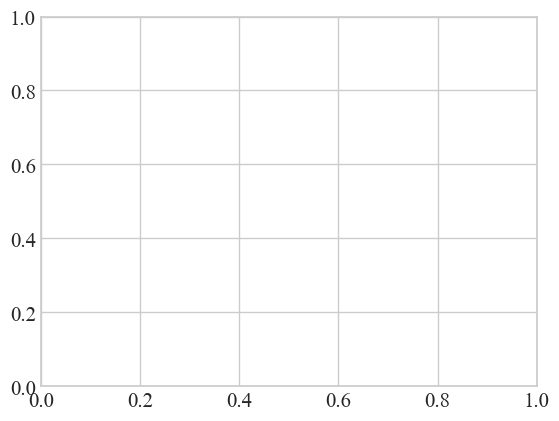

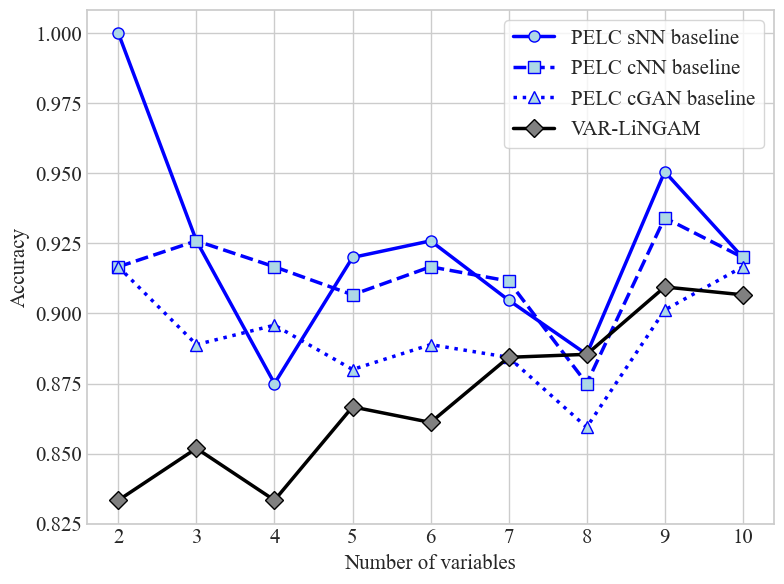

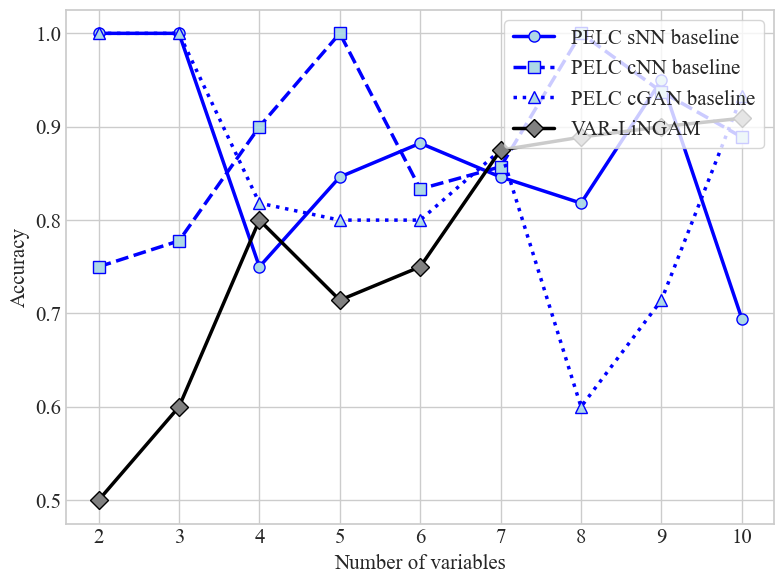

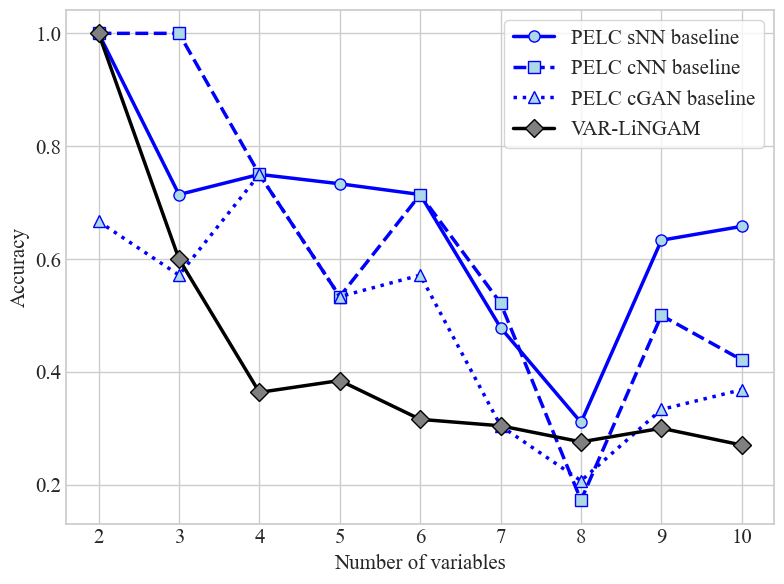

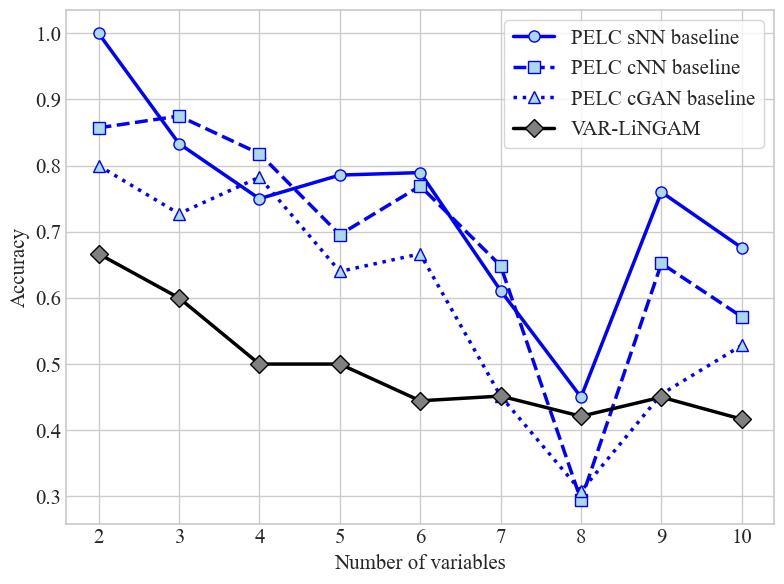

In [114]:
# # sns.set(style="whitegrid", palette="muted", color_codes=True) 
# plt.rcParams['xtick.direction'] = 'in'
# plt.rcParams['ytick.direction'] = 'in'
# plt.rcParams["font.family"] = "Times New Roman"   # 使用するフォント
# plt.rcParams["font.size"] = 12                # 文字の大きさ
# plt.tick_params(labelsize = 15) 
# # cm = plt.get_cmap("Spectral")
# cm_01 = plt.get_cmap("spring")
# cm_02 = plt.get_cmap("summer")
# cm_03 = plt.get_cmap("autumn")
# cm_04 = plt.get_cmap("winter")
# # plt.rcParams["font.size"] = 10
# # plt.xlabel("Time (arbitrary unit)")
# # plt.ylabel(r"$X(t)$",rotation=0)

# Metric_list = ["Accuracy","Precision","Recall","F1"]

# for Metric in Metric_list:
#     fig, ax1 = plt.subplots(figsize=(8, 6), tight_layout=True)
#     # ax2 = ax1.twinx()
#     # 2軸グラフの本体設定
#     ax1.plot(df20["Num_of_var"], df_sp_bl[Metric],
#             color = "blue", label="PELC sNN baseline", linewidth=2.5, linestyle="-", marker='o', markersize=8, markerfacecolor="lightblue",markeredgewidth=1, markeredgecolor="blue") # cm.Set2.colors[0]
#     ax1.plot(df21["Num_of_var"], df_cd_bl[Metric],
#             color = "blue", label="PELC cNN baseline", linewidth=2.5, linestyle="dashed", marker='s', markersize=8, markerfacecolor="lightblue",markeredgewidth=1, markeredgecolor="blue")
#     ax1.plot(df22["Num_of_var"], df_gn_bl[Metric],
#             color = "blue", label="PELC cGAN baseline", linewidth=2.5, linestyle="dotted", marker='^', markersize=9, markerfacecolor="lightblue",markeredgewidth=1, markeredgecolor="blue")

#     # ax1.plot(df20["Num_of_var"], df_sp_ab[Metric],
#     #         color = cm_02(1/8), label="PELC sNN ablation", linewidth=2.5, linestyle="-", marker='o', markersize=8, markerfacecolor="w") # cm.Set2.colors[0]
#     # ax1.plot(df21["Num_of_var"], df_cd_ab[Metric],
#     #         color = cm_02(2/8), label="PELC cNN ablation", linewidth=2.5, linestyle="dashed", marker='s', markersize=8, markerfacecolor="w")
#     # ax1.plot(df22["Num_of_var"], df_gn_ab[Metric],
#     #         color = cm_02(3/8), label="PELC cGAN ablation", linewidth=2.5, linestyle="dotted", marker='^', markersize=9, markerfacecolor="w")

#     # ax1.plot(df20["Num_of_var"], df_sp_l1[Metric],
#     #         color = cm_03(1/8), label="PELC sNN L1", linewidth=2.5, linestyle="-", marker='o', markersize=8, markerfacecolor="w") # cm.Set2.colors[0]
#     # ax1.plot(df21["Num_of_var"], df_cd_l1[Metric],
#     #         color = cm_03(2/8), label="PELC cNN L1", linewidth=2.5, linestyle="dashed", marker='s', markersize=8, markerfacecolor="w")
#     # ax1.plot(df22["Num_of_var"], df_gn_l1[Metric],
#     #         color = cm_03(3/8), label="PELC cGAN L1", linewidth=2.5, linestyle="dotted", marker='^', markersize=9, markerfacecolor="w")

#     # ax1.plot(df20["Num_of_var"], df_sp_l2[Metric],
#     #         color = cm_04(1/8), label="PELC sNN L2", linewidth=2.5, linestyle="-", marker='o', markersize=8, markerfacecolor="w") # cm.Set2.colors[0]
#     # ax1.plot(df21["Num_of_var"], df_cd_l2[Metric],
#     #         color = cm_04(2/8), label="PELC cNN L2", linewidth=2.5, linestyle="dashed", marker='s', markersize=8, markerfacecolor="w")
#     # ax1.plot(df22["Num_of_var"], df_gn_l2[Metric],
#     #         color = cm_04(3/8), label="PELC cGAN L2", linewidth=2.5, linestyle="dotted", marker='^', markersize=9, markerfacecolor="w")

#     ax1.plot(df22["Num_of_var"], df_vm[Metric],
#             color = 'black', label="VAR-LiNGAM", linewidth=2.5, linestyle="-", marker='D', markersize=9, markerfacecolor="grey",markeredgewidth=1, markeredgecolor="black")

#     ax1.xaxis.set_major_locator(MaxNLocator(integer=True)) # 目盛りを整数にする
#     # ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
#     # ax1.set_xticks(np.linspace(2,len(df6)+1,len(df6)-2+1+1))

#     plt.tick_params(labelsize = 15) #目盛線ラベルのフォントサイズ
#     ax1.tick_params(labelsize = 15) 
#     # ax2.tick_params(labelsize = 15) 

#     # 凡例の表示のため、handler1と2にはグラフオブジェクトのリスト情報が入る
#     # label1と2には、凡例用に各labelのリスト情報が入る
#     handler1, label1 = ax1.get_legend_handles_labels()
#     # handler2, label2 = ax2.get_legend_handles_labels()
#     # 凡例をまとめて出力する
#     # ax1.legend(handler1 + handler2, label1 + label2,  borderaxespad=0.5, fontsize=14) # loc='upper left', bbox_to_anchor=(1.1, 1),
#     ax1.legend(handler1 , label1 ,  borderaxespad=0.5, fontsize=15, loc="upper right") # loc='upper left', bbox_to_anchor=(1.02, 1)
#     ax1.set_xlabel('Number of variables',fontsize=15)
#     # ax1.set_xlim([2, 10])
#     # ax1.set_ylim([0.8,1.0])
#     ax1.set_ylabel('Accuracy',fontsize=15)
#     ax1.grid(True)
#     # ax2.set_ylabel('Time (sec.)')
#     # ax2.set_ylim([0.0,math.ceil(max(df6["Time"]))])
#     # ax2.grid(False)
#     plt.savefig("C:/Users/Mitsu/Desktop/AISTATS/231001_Results/Results_plot_"+Metric+".png")
#     plt.savefig("C:/Users/Mitsu/Desktop/AISTATS/231001_Results/Results_plot_"+Metric+".svg")
#     plt.savefig("C:/Users/Mitsu/Desktop/AISTATS/231001_Results/Results_plot_"+Metric+".eps")

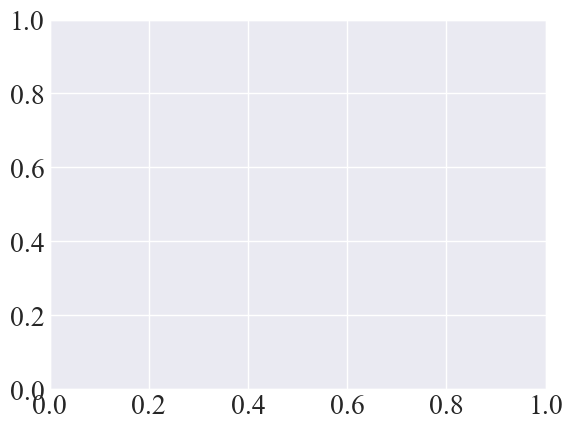

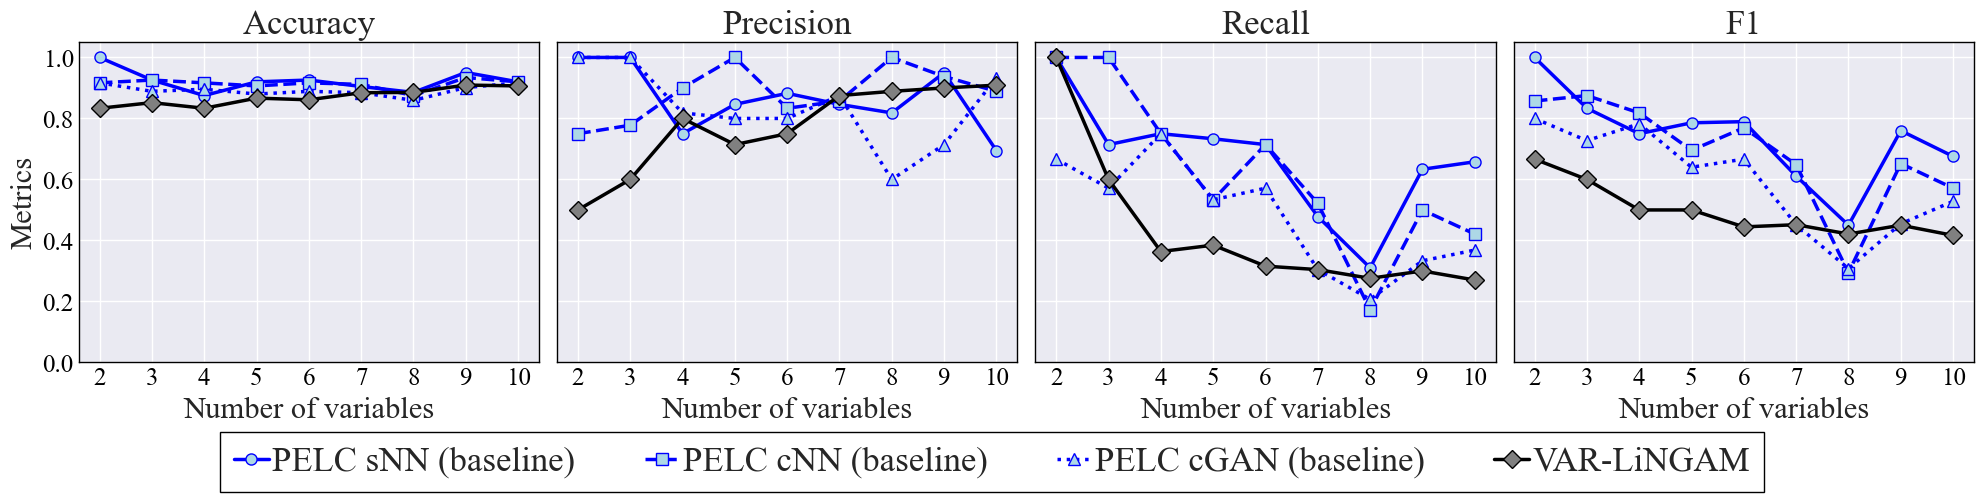

In [34]:
sns.set(style="darkgrid", palette="muted", color_codes=True) 
# plt.rcParams['font.family']='DejaVu Sans'
# plt.rcParams['font.sans-serif']='Microsoft Sans Serif'
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['font.size']=14
plt.rcParams['xtick.major.width']=1.0
plt.rcParams['ytick.major.width']=1.0
plt.rcParams['axes.linewidth']=1.0

# plt.rcParams['font.family'] = 'DejaVu Sans' # font familyの設定 
plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定 stix
plt.rcParams["font.size"] = 14 # 全体のフォントサイズが変更されます。
plt.rcParams['xtick.labelsize'] = 11 # 軸だけ変更されます。
plt.rcParams['ytick.labelsize'] = 11 # 軸だけ変更されます
# plt.rcParams['axes.grid'] = True # make grid
plt.rcParams["legend.fancybox"] = False # 丸角
plt.rcParams["legend.framealpha"] = 1 # 透明度の指定、0で塗りつぶしなし
plt.rcParams["legend.edgecolor"] = 'black' # edgeの色を変更
plt.rcParams["legend.handlelength"] = 1 # 凡例の線の長さを調節
plt.rcParams["legend.labelspacing"] = 0.1 # 垂直方向（縦）の距離の各凡例の距離
plt.rcParams["legend.handletextpad"] = 0.1 # 凡例の線と文字の距離の長さ
# plt.rcParams["legend.markerscale"] = 2 # 点がある場合のmarker scale
# plt.style.use('seaborn-colorblind')
# sns.heatmap(df4,cmap="cividis")
# plt.savefig('/content/drive/MyDrive/210713_cormat.eps', bbox_inches="tight", pad_inches=0.05,dpi=350) 
# plt.show()

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams["font.family"] = "Times New Roman"   # 使用するフォント
plt.rcParams["font.size"] = 12                # 文字の大きさ
plt.tick_params(labelsize = 20) 
# cm = plt.get_cmap("Spectral")
cm_01 = plt.get_cmap("spring")
cm_02 = plt.get_cmap("summer")
cm_03 = plt.get_cmap("autumn")
cm_04 = plt.get_cmap("winter")
# plt.rcParams["font.size"] = 10
# plt.xlabel("Time (arbitrary unit)")
# plt.ylabel(r"$X(t)$",rotation=0)
spines = 1.0
fig = plt.figure(figsize = (20,4.5), tight_layout=True)
ax_dict = dict()
Metric_list = ["Accuracy","Precision","Recall","F1"]

hhh = 1
for Metric in Metric_list:
    ax_dict[Metric] = fig.add_subplot(1, 4, hhh)
    hhh +=1
    
for Metric in Metric_list:
    
    # ax2 = ax1.twinx()
    # 2軸グラフの本体設定
    ax_dict[Metric].plot(df_sp_bl["Num_of_var"], df_sp_bl[Metric],
            color = "blue", label="PELC sNN (baseline)", linewidth=2.5, linestyle="-", marker='o', markersize=8, markerfacecolor="lightblue",markeredgewidth=1, markeredgecolor="blue") # cm.Set2.colors[0]
    ax_dict[Metric].plot(df_cd_bl["Num_of_var"], df_cd_bl[Metric],
            color = "blue", label="PELC cNN (baseline)", linewidth=2.5, linestyle="dashed", marker='s', markersize=8, markerfacecolor="lightblue",markeredgewidth=1, markeredgecolor="blue")
    ax_dict[Metric].plot(df_gn_bl["Num_of_var"], df_gn_bl[Metric],
            color = "blue", label="PELC cGAN (baseline)", linewidth=2.5, linestyle="dotted", marker='^', markersize=9, markerfacecolor="lightblue",markeredgewidth=1, markeredgecolor="blue")

    # ax1.plot(df20["Num_of_var"], df_sp_ab[Metric],
    #         color = cm_02(1/8), label="PELC sNN ablation", linewidth=2.5, linestyle="-", marker='o', markersize=8, markerfacecolor="w") # cm.Set2.colors[0]
    # ax1.plot(df21["Num_of_var"], df_cd_ab[Metric],
    #         color = cm_02(2/8), label="PELC cNN ablation", linewidth=2.5, linestyle="dashed", marker='s', markersize=8, markerfacecolor="w")
    # ax1.plot(df22["Num_of_var"], df_gn_ab[Metric],
    #         color = cm_02(3/8), label="PELC cGAN ablation", linewidth=2.5, linestyle="dotted", marker='^', markersize=9, markerfacecolor="w")

    # ax1.plot(df20["Num_of_var"], df_sp_l1[Metric],
    #         color = cm_03(1/8), label="PELC sNN L1", linewidth=2.5, linestyle="-", marker='o', markersize=8, markerfacecolor="w") # cm.Set2.colors[0]
    # ax1.plot(df21["Num_of_var"], df_cd_l1[Metric],
    #         color = cm_03(2/8), label="PELC cNN L1", linewidth=2.5, linestyle="dashed", marker='s', markersize=8, markerfacecolor="w")
    # ax1.plot(df22["Num_of_var"], df_gn_l1[Metric],
    #         color = cm_03(3/8), label="PELC cGAN L1", linewidth=2.5, linestyle="dotted", marker='^', markersize=9, markerfacecolor="w")

    # ax1.plot(df20["Num_of_var"], df_sp_l2[Metric],
    #         color = cm_04(1/8), label="PELC sNN L2", linewidth=2.5, linestyle="-", marker='o', markersize=8, markerfacecolor="w") # cm.Set2.colors[0]
    # ax1.plot(df21["Num_of_var"], df_cd_l2[Metric],
    #         color = cm_04(2/8), label="PELC cNN L2", linewidth=2.5, linestyle="dashed", marker='s', markersize=8, markerfacecolor="w")
    # ax1.plot(df22["Num_of_var"], df_gn_l2[Metric],
    #         color = cm_04(3/8), label="PELC cGAN L2", linewidth=2.5, linestyle="dotted", marker='^', markersize=9, markerfacecolor="w")

    ax_dict[Metric].plot(df_vm["Num_of_var"], df_vm[Metric],
            color = 'black', label="VAR-LiNGAM", linewidth=2.5, linestyle="-", marker='D', markersize=9, markerfacecolor="grey",markeredgewidth=1, markeredgecolor="black")

    ax_dict[Metric].xaxis.set_major_locator(MaxNLocator(integer=True)) # 目盛りを整数にする
    # ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
    # ax1.set_xticks(np.linspace(2,len(df6)+1,len(df6)-2+1+1))
    
    if Metric == "Accuracy":
        ax_dict[Metric].set_ylabel("Metrics",fontsize=22)
    
    ax_dict[Metric].set_title(Metric,fontsize=25)
    plt.tick_params(labelsize = 18) #目盛線ラベルのフォントサイズ
    
    ax_dict[Metric].set_xlabel('Number of variables',fontsize=22)
    ax_dict[Metric].tick_params(labelsize = 18) 
    # ax2.tick_params(labelsize = 15) 
    ax_dict[Metric].spines["top"].set_linewidth(spines)
    ax_dict[Metric].spines["left"].set_linewidth(spines)
    ax_dict[Metric].spines["bottom"].set_linewidth(spines)
    ax_dict[Metric].spines["right"].set_linewidth(spines)
    ax_dict[Metric].spines["top"].set_color("black")
    ax_dict[Metric].spines["left"].set_color("black")
    ax_dict[Metric].spines["bottom"].set_color("black")
    ax_dict[Metric].spines["right"].set_color("black")
    ax_dict[Metric].tick_params(direction = "in", length = 3, colors = "black")
    ax_dict[Metric].tick_params(axis="x",which='major', length=5)
    
    ax_dict[Metric].set_ylim([0.0,1.05])
    if Metric != "Accuracy":
        ax_dict[Metric].yaxis.set_ticklabels([])
    plt.grid(True)

# 凡例の表示のため、handler1と2にはグラフオブジェクトのリスト情報が入る
# label1と2には、凡例用に各labelのリスト情報が入る
handler1, label1 = ax_dict["F1"].get_legend_handles_labels()
# handler2, label2 = ax2.get_legend_handles_labels()
# 凡例をまとめて出力する
# ax1.legend(handler1 + handler2, label1 + label2,  borderaxespad=0.5, fontsize=14) # loc='upper left', bbox_to_anchor=(1.1, 1),

l = fig.legend(handler1 , label1 ,  borderaxespad=0.5, fontsize=25, bbox_to_anchor=(0.5, -0.15), loc='lower center', ncol=4, facecolor="white") # loc="upper right" 
# l.set_zorder(10)    
# ax2.set_ylabel('Time (sec.)')
# ax2.set_ylim([0.0,math.ceil(max(df6["Time"]))])
# ax2.grid(False)

# plt.savefig("C:/Users/Mitsu/Desktop/AISTATS/231001_Results/231007_Results_plot.png", bbox_inches='tight')
# plt.savefig("C:/Users/Mitsu/Desktop/AISTATS/231001_Results/231007_Results_plot.svg", bbox_inches='tight')
# plt.savefig("C:/Users/Mitsu/Desktop/AISTATS/231001_Results/231007_Results_plot.eps", bbox_inches='tight')
# plt.savefig("C:/Users/Mitsu/Desktop/AISTATS/231001_Results/231007_Results_plot_dpi300.png", bbox_inches='tight',dpi=300)
# plt.savefig("C:/Users/Mitsu/Desktop/AISTATS/231001_Results/231007_Results_plot_dpi300.svg", bbox_inches='tight',dpi=300)
# plt.savefig("C:/Users/Mitsu/Desktop/AISTATS/231001_Results/231007_Results_plot_dpi300.eps", bbox_inches='tight',dpi=300)

([<matplotlib.axis.XTick at 0x1beaf628550>,
 [Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9'),
  Text(10.0, 0, '10')])

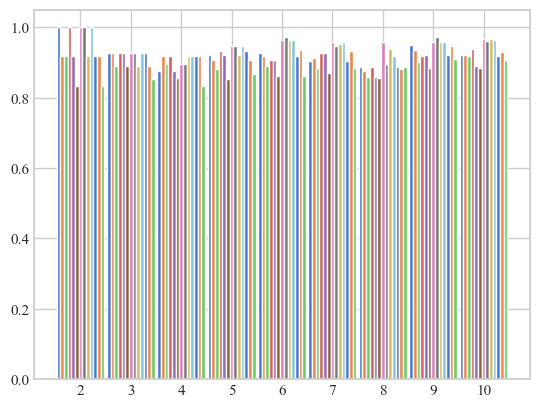

In [97]:
# # 棒グラフはいまいちか…
# Metric = "Accuracy" 
# # 棒の配置位置、ラベルを用意
# x = np.linspace(2,10,9)
# labels = ["2","3","4","5","6","7","8","9","10"]

# # 各系列のデータを用意
# height = df_sp_bl[Metric]
# height2 = df_cd_bl[Metric]
# height3 = df_gn_bl[Metric]

# height4 = df_sp_ab[Metric]
# height5 = df_cd_ab[Metric]
# height6 = df_gn_ab[Metric]

# height7 = df_sp_l1[Metric]
# height8 = df_cd_l1[Metric]
# height9 = df_gn_l1[Metric]

# height10 = df_sp_l2[Metric]
# height11 = df_cd_l2[Metric]
# height12 = df_gn_l2[Metric]

# height13 = df_vm[Metric]
# data = [height, height2, height3, height4, height5, height6, height7, height8, height9, height10, height11, height12, height13]
 
# # マージンを設定
# margin = 0.05  #0 <margin< 1
# total_width = 1 - margin
 
# # 棒グラフをプロット
# for i, h in enumerate(data):
#   pos = x - total_width *( 1- (2*i+1)/len(data) )/2
#   plt.bar(pos, h, width = total_width/len(data))
 
# # ラベルの設定
# plt.xticks(x, labels)

## 結果その３

PELC(SimpleNN）の中でbaseline, Ablation, L1, L2の比較×変数50まででスケーラビリティ実験。これは図。

In [35]:
df_sp_bl = SIMPLE["baseline"].head(n=50)
df_sp_ab = SIMPLE["ablation"].head(n=50)
df_sp_l1 = SIMPLE["L1"].head(n=50)
df_sp_l2 = SIMPLE["L2"].head(n=50)

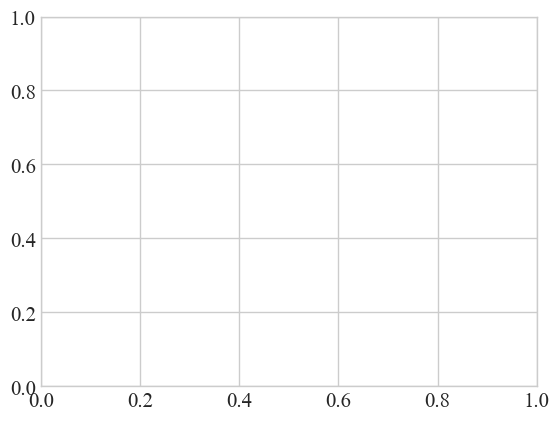

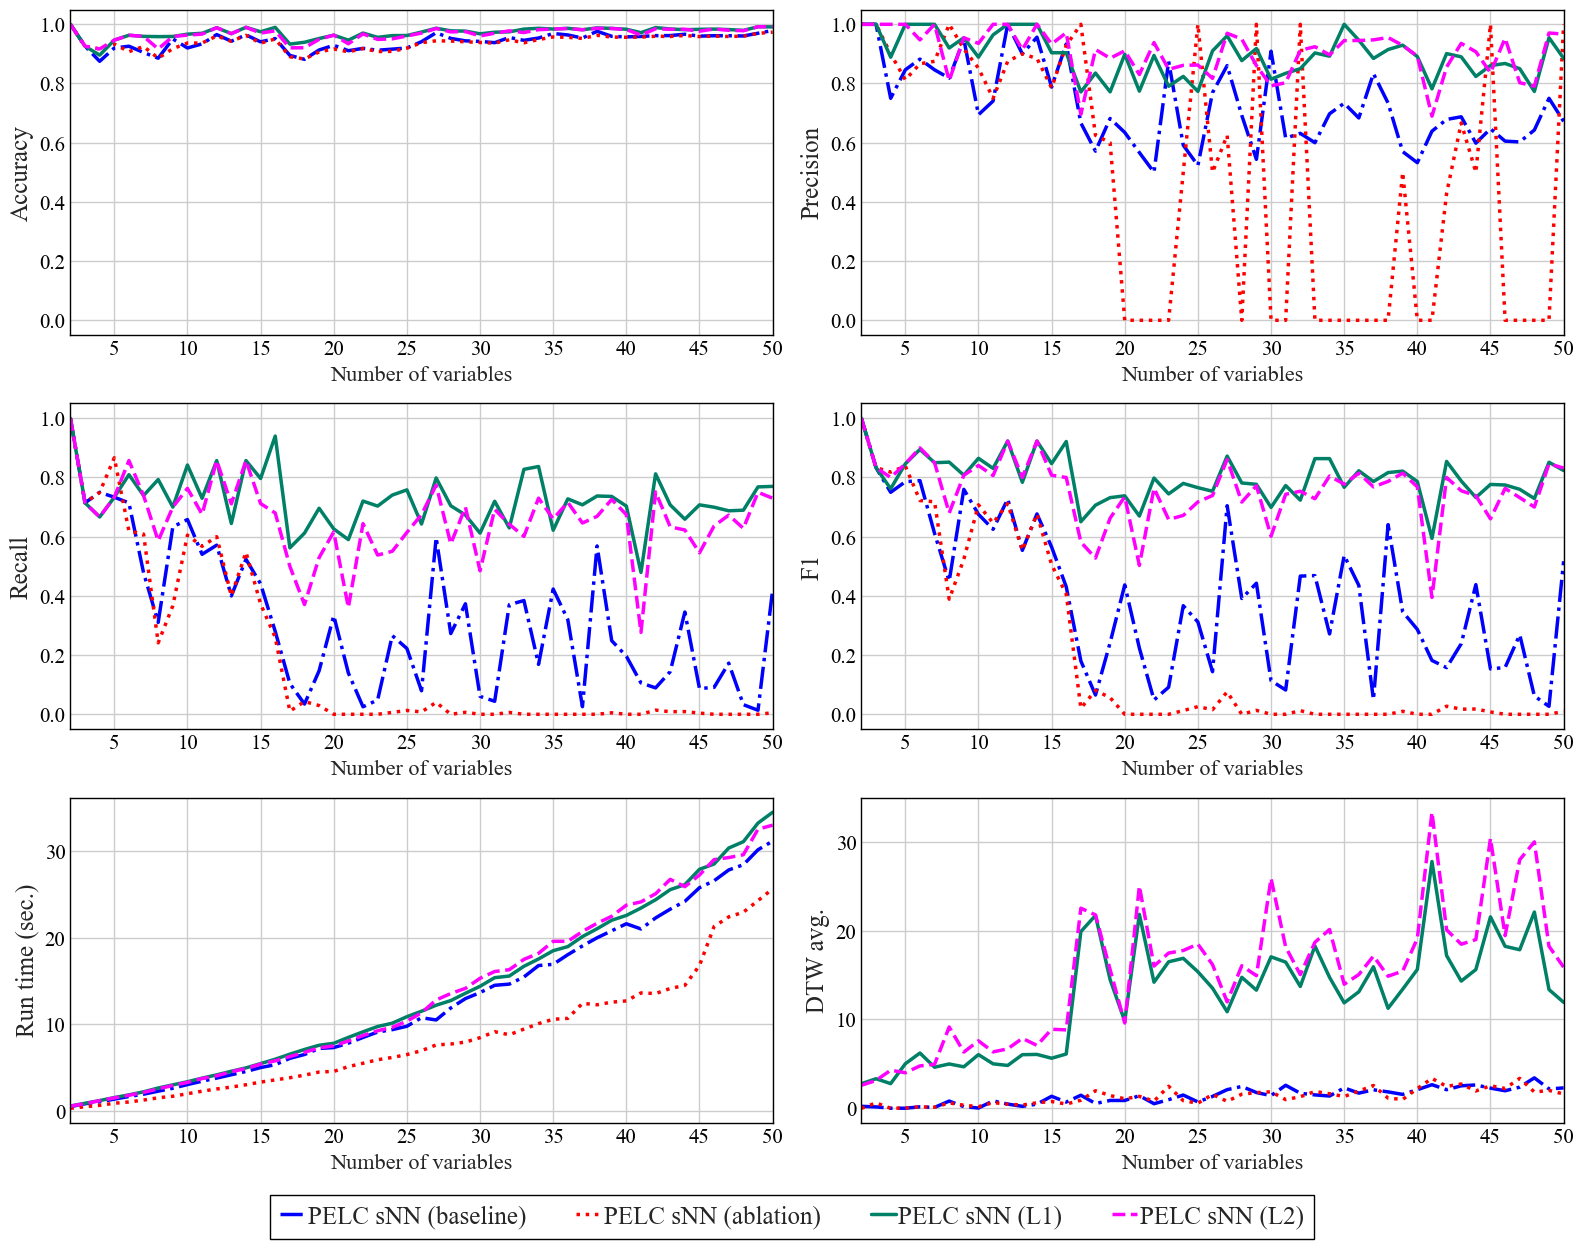

In [214]:
# sns.set(style="whitegrid", palette="muted", color_codes=True) 
# plt.rcParams['font.family']='DejaVu Sans'
# plt.rcParams['font.sans-serif']='Microsoft Sans Serif'
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['font.size']=14
plt.rcParams['xtick.major.width']=1.0
plt.rcParams['ytick.major.width']=1.0
plt.rcParams['axes.linewidth']=1.0

# plt.rcParams['font.family'] = 'DejaVu Sans' # font familyの設定 
plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定 stix
plt.rcParams["font.size"] = 14 # 全体のフォントサイズが変更されます。
plt.rcParams['xtick.labelsize'] = 11 # 軸だけ変更されます。
plt.rcParams['ytick.labelsize'] = 11 # 軸だけ変更されます
# plt.rcParams['axes.grid'] = True # make grid
plt.rcParams["legend.fancybox"] = False # 丸角
plt.rcParams["legend.framealpha"] = 1 # 透明度の指定、0で塗りつぶしなし
plt.rcParams["legend.edgecolor"] = 'black' # edgeの色を変更
plt.rcParams["legend.handlelength"] = 1 # 凡例の線の長さを調節
plt.rcParams["legend.labelspacing"] = 0.1 # 垂直方向（縦）の距離の各凡例の距離
plt.rcParams["legend.handletextpad"] = 0.1 # 凡例の線と文字の距離の長さ
# plt.rcParams["legend.markerscale"] = 2 # 点がある場合のmarker scale
# plt.style.use('seaborn-colorblind')
# sns.heatmap(df4,cmap="cividis")
# plt.savefig('/content/drive/MyDrive/210713_cormat.eps', bbox_inches="tight", pad_inches=0.05,dpi=350) 
# plt.show()

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams["font.family"] = "Times New Roman"   # 使用するフォント
plt.rcParams["font.size"] = 12                # 文字の大きさ
plt.tick_params(labelsize = 15) 
# cm = plt.get_cmap("Spectral")
cm_01 = plt.get_cmap("spring")
cm_02 = plt.get_cmap("summer")
cm_03 = plt.get_cmap("autumn")
cm_04 = plt.get_cmap("winter")
# plt.rcParams["font.size"] = 10
# plt.xlabel("Time (arbitrary unit)")
# plt.ylabel(r"$X(t)$",rotation=0)
spines = 1.0
fig = plt.figure(figsize = (16,12), tight_layout=True)
ax_dict = dict()
Metric_list = ["Accuracy","Precision","Recall","F1","Time","DTW_mean"]

hhh = 1
for Metric in Metric_list:
    ax_dict[Metric] = fig.add_subplot(3, 2, hhh)
    hhh +=1
    
for Metric in Metric_list:
    
    # ax2 = ax1.twinx()
    # 2軸グラフの本体設定
    ax_dict[Metric].plot(df_sp_bl["Num_of_var"], df_sp_bl[Metric],
            color = cm_04(0), label="PELC sNN (baseline)", linewidth=2.5, linestyle="-.") # cm.Set2.colors[0] #marker='o', markersize=8
#     ax_dict[Metric].plot(df21["Num_of_var"], df_cd_bl[Metric],
#             color = "blue", label="PELC cNN (baseline)", linewidth=2.5, linestyle="dashed", marker='s', markersize=8, markerfacecolor="lightblue",markeredgewidth=1, markeredgecolor="blue")
#     ax_dict[Metric].plot(df22["Num_of_var"], df_gn_bl[Metric],
#             color = "blue", label="PELC cGAN (baseline)", linewidth=2.5, linestyle="dotted", marker='^', markersize=9, markerfacecolor="lightblue",markeredgewidth=1, markeredgecolor="blue")

    ax_dict[Metric].plot(df_sp_ab["Num_of_var"], df_sp_ab[Metric],
            color = cm_03(0), label="PELC sNN (ablation)", linewidth=2.5, linestyle="dotted") # cm.Set2.colors[0] #marker='o', markersize=8, 
    # ax1.plot(df21["Num_of_var"], df_cd_ab[Metric],
    #         color = cm_02(2/8), label="PELC cNN ablation", linewidth=2.5, linestyle="dashed", marker='s', markersize=8, markerfacecolor="w")
    # ax1.plot(df22["Num_of_var"], df_gn_ab[Metric],
    #         color = cm_02(3/8), label="PELC cGAN ablation", linewidth=2.5, linestyle="dotted", marker='^', markersize=9, markerfacecolor="w")

    ax_dict[Metric].plot(df_sp_l1["Num_of_var"], df_sp_l1[Metric],
            color = cm_02(0), label="PELC sNN (L1)", linewidth=2.5, linestyle="solid") # cm.Set2.colors[0] # marker='o', markersize=8,
    # ax1.plot(df21["Num_of_var"], df_cd_l1[Metric],
    #         color = cm_03(2/8), label="PELC cNN L1", linewidth=2.5, linestyle="dashed", marker='s', markersize=8, markerfacecolor="w")
    # ax1.plot(df22["Num_of_var"], df_gn_l1[Metric],
    #         color = cm_03(3/8), label="PELC cGAN L1", linewidth=2.5, linestyle="dotted", marker='^', markersize=9, markerfacecolor="w")

    ax_dict[Metric].plot(df_sp_l2["Num_of_var"], df_sp_l2[Metric],
            color = cm_01(0), label="PELC sNN (L2)", linewidth=2.5, linestyle="dashed") # cm.Set2.colors[0] #marker='o', markersize=8, 
    # ax1.plot(df21["Num_of_var"], df_cd_l2[Metric],
    #         color = cm_04(2/8), label="PELC cNN L2", linewidth=2.5, linestyle="dashed", marker='s', markersize=8, markerfacecolor="w")
    # ax1.plot(df22["Num_of_var"], df_gn_l2[Metric],
    #         color = cm_04(3/8), label="PELC cGAN L2", linewidth=2.5, linestyle="dotted", marker='^', markersize=9, markerfacecolor="w")

#     ax_dict[Metric].plot(df22["Num_of_var"], df_vm[Metric],
#             color = 'black', label="VAR-LiNGAM", linewidth=2.5, linestyle="-", marker='D', markersize=9, markerfacecolor="grey",markeredgewidth=1, markeredgecolor="black")
    
    ax_dict[Metric].xaxis.set_major_locator(MaxNLocator(integer=True)) # 目盛りを整数にする
    # ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
    # ax1.set_xticks(np.linspace(2,len(df6)+1,len(df6)-2+1+1))
    if Metric == "Time":
        ax_dict[Metric].set_ylabel("Run time (sec.)",fontsize=18)
    elif Metric == "DTW_mean":
        ax_dict[Metric].set_ylabel("DTW avg.",fontsize=18)
    else:    
        ax_dict[Metric].set_ylabel(Metric,fontsize=18)

    plt.tick_params(labelsize = 15) #目盛線ラベルのフォントサイズ
    
    ax_dict[Metric].set_xlabel('Number of variables',fontsize=16)
    ax_dict[Metric].tick_params(labelsize = 15) 
    # ax2.tick_params(labelsize = 15) 
    ax_dict[Metric].spines["top"].set_linewidth(spines)
    ax_dict[Metric].spines["left"].set_linewidth(spines)
    ax_dict[Metric].spines["bottom"].set_linewidth(spines)
    ax_dict[Metric].spines["right"].set_linewidth(spines)
    ax_dict[Metric].spines["top"].set_color("black")
    ax_dict[Metric].spines["left"].set_color("black")
    ax_dict[Metric].spines["bottom"].set_color("black")
    ax_dict[Metric].spines["right"].set_color("black")
    ax_dict[Metric].tick_params(direction = "in", length = 3, colors = "black")
    ax_dict[Metric].tick_params(axis="x",which='major', length=5)
    
    plt.grid(True)
    if Metric == "DTW_mean" or Metric == "Time":
        pass
    else:
        ax_dict[Metric].set_ylim([-0.05,1.05])
        
    ax_dict[Metric].set_xlim([2,50])
#     plt.ylim([2,50])

# 凡例の表示のため、handler1と2にはグラフオブジェクトのリスト情報が入る
# label1と2には、凡例用に各labelのリスト情報が入る
handler1, label1 = ax_dict["F1"].get_legend_handles_labels()
# handler2, label2 = ax2.get_legend_handles_labels()
# 凡例をまとめて出力する
# ax1.legend(handler1 + handler2, label1 + label2,  borderaxespad=0.5, fontsize=14) # loc='upper left', bbox_to_anchor=(1.1, 1),

l = fig.legend(handler1 , label1 ,  borderaxespad=0.5, fontsize=18, bbox_to_anchor=(0.5, -0.05), loc='lower center', ncol=4) # loc="upper right" 
# l.set_zorder(10)    
# ax2.set_ylabel('Time (sec.)')
# ax2.set_ylim([0.0,math.ceil(max(df6["Time"]))])
# ax2.grid(False)

# plt.savefig("C:/Users/Mitsu/Desktop/AISTATS/231001_Results/231007_Scalability_plot.png", bbox_inches='tight')
# plt.savefig("C:/Users/Mitsu/Desktop/AISTATS/231001_Results/231007_Scalability_plot.svg", bbox_inches='tight')
# plt.savefig("C:/Users/Mitsu/Desktop/AISTATS/231001_Results/231007_Scalability_plot.eps", bbox_inches='tight')
# plt.savefig("C:/Users/Mitsu/Desktop/AISTATS/231001_Results/231007_Scalability_plot_dpi300.png", bbox_inches='tight',dpi=300)
# plt.savefig("C:/Users/Mitsu/Desktop/AISTATS/231001_Results/231007_Scalability_plot_dpi300.svg", bbox_inches='tight',dpi=300)
# plt.savefig("C:/Users/Mitsu/Desktop/AISTATS/231001_Results/231007_Scalability_plot_dpi300.eps", bbox_inches='tight',dpi=300)

## AUC曲線

In [ ]:
import matplotlib.pyplot as plt

In [36]:
df_vm = VARLINGAM["baseline"].head(n=22)

df_sp_bl = SIMPLE["baseline"].head(n=50)
df_cd_bl = CONDI["baseline"].head(n=50)
df_gn_bl = GAN["baseline"].head(n=50)

df_sp_ab = SIMPLE["ablation"].head(n=50)
df_cd_ab = CONDI["ablation"].head(n=50)
df_gn_ab = GAN["ablation"].head(n=50)

df_sp_l1 = SIMPLE["L1"].head(n=50)
df_cd_l1 = CONDI["L1"].head(n=50)
df_gn_l1 = GAN["L1"].head(n=50)

df_sp_l2 = SIMPLE["L2"].head(n=50)
df_cd_l2 = CONDI["L2"].head(n=50)
df_gn_l2 = GAN["L2"].head(n=50)

- FPR: false positive rate（偽陽性率）

  - 陰性を間違って陽性と判定した割合
  - 小さい方が良い
  - FPR = FP / (FP+TN) = 1 - Specificity = 1 - TN/(TN+FP)

- TPR: true positive rate（真陽性率）

  - 陽性を正しく陽性と判定した割合
  - 大きいほうが良い
  - recall（再現率）やsensitivity, hit rateなどとも呼ばれる
  - TPR = TP / (TP + FN)

1/Precision = (TP+FP)/TP = 1 + FP/TP
1/Recall = (TP+FN)/TP = 1 + FN/TP
1/{1/(1+FP+FN)} = 1+FP+FN
1/Accuracy = {(TP+TN)+(FP+FN)}/(TP+TN) = 1 + (FP+FN)/(TP+TN)

FP/TP = 1/Precision - 1
FP = (1/Precision - 1) * TP
TP = FP / (1/Precision - 1)
FN/TP = 1/Recall - 1
FN = (1/Recall - 1) * TP
FP+FN = 1/{1/(1+FP+FN)} - 1
1/{1/(1+FP+FN)} - 1 = (1/Precision - 1) * TP + (1/Recall - 1) * TP
TP = {1/{1/(1+FP+FN)} - 1} / {(1/Precision - 1) + (1/Recall - 1)}
FP+FN = (1/Accuracy - 1) * (TP+TN)
TP+TN = (FP+FN) / (1/Accuracy - 1)

FPR = 1 - TN/(TN+FP)
1 - FPR = TN/(TN+FP)

TP = {1/{1/(1+FP+FN)} - 1} / {(1/Precision - 1) + (1/Recall - 1)}
tmp = 1/(1-FPR) = (TN+FP)/TN = 1 + FP/TN = 1 + ((1/Precision - 1) * TP)/ {(1/{1/(1+FP+FN)} - 1)/(1/Accuracy - 1) - TP}
FPR = 1 - 1/tmp

In [37]:
def FPR_calc(Accuracy,Precision,Recall, Metric2):
    TP = (1/Metric2 - 1) / ((1/Precision - 1) + (1/Recall - 1))
    tmp = 1 + ((1/Precision - 1) * TP)/ ((1/Metric2 - 1)/(1/Accuracy - 1) - TP)
    FPR = 1 - 1/tmp
    return FPR

In [38]:
def Extract_Metric(df,num_of_var):
    Accuracy =  df[df["Num_of_var"]==num_of_var]["Accuracy"].values[0]
    Precision = df[df["Num_of_var"]==num_of_var]["Precision"].values[0]
    Recall = df[df["Num_of_var"]==num_of_var]["Recall"].values[0]
    Metric2 = df[df["Num_of_var"]==num_of_var]["1/(1+FP+FN)"].values[0]
    return Accuracy, Precision, Recall, Metric2

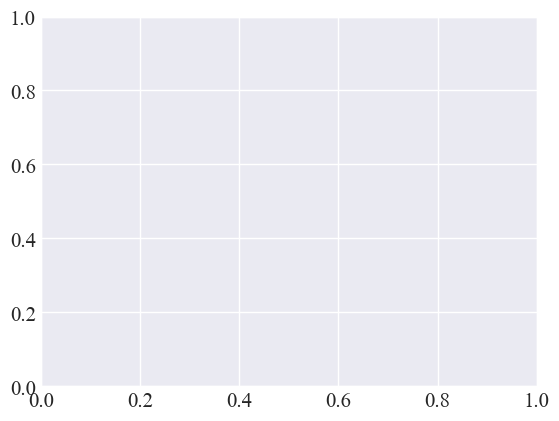

In [39]:
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['font.size']=14
plt.rcParams['xtick.major.width']=1.0
plt.rcParams['ytick.major.width']=1.0
plt.rcParams['axes.linewidth']=1.0

# plt.rcParams['font.family'] = 'DejaVu Sans' # font familyの設定 
plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定 stix
plt.rcParams["font.size"] = 14 # 全体のフォントサイズが変更されます。
plt.rcParams['xtick.labelsize'] = 11 # 軸だけ変更されます。
plt.rcParams['ytick.labelsize'] = 11 # 軸だけ変更されます
# plt.rcParams['axes.grid'] = True # make grid
plt.rcParams["legend.fancybox"] = False # 丸角
plt.rcParams["legend.framealpha"] = 1 # 透明度の指定、0で塗りつぶしなし
plt.rcParams["legend.edgecolor"] = 'black' # edgeの色を変更
plt.rcParams["legend.handlelength"] = 1 # 凡例の線の長さを調節
plt.rcParams["legend.labelspacing"] = 0.1 # 垂直方向（縦）の距離の各凡例の距離
plt.rcParams["legend.handletextpad"] = 0.1 # 凡例の線と文字の距離の長さ
# plt.rcParams["legend.markerscale"] = 2 # 点がある場合のmarker scale
# plt.style.use('seaborn-colorblind')
# sns.heatmap(df4,cmap="cividis")
# plt.savefig('/content/drive/MyDrive/210713_cormat.eps', bbox_inches="tight", pad_inches=0.05,dpi=350) 
# plt.show()

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams["font.family"] = "Times New Roman"   # 使用するフォント
plt.rcParams["font.size"] = 12                # 文字の大きさ
plt.tick_params(labelsize = 15) 

C:\Users\Mitsu\AppData\Local\Temp\ipykernel_2180\935190261.py:2: RuntimeWarning: invalid value encountered in scalar divide
  TP = (1/Metric2 - 1) / ((1/Precision - 1) + (1/Recall - 1))
C:\Users\Mitsu\AppData\Local\Temp\ipykernel_2180\935190261.py:3: RuntimeWarning: invalid value encountered in scalar divide
  tmp = 1 + ((1/Precision - 1) * TP)/ ((1/Metric2 - 1)/(1/Accuracy - 1) - TP)
C:\Users\Mitsu\AppData\Local\Temp\ipykernel_2180\935190261.py:2: RuntimeWarning: invalid value encountered in scalar divide
  TP = (1/Metric2 - 1) / ((1/Precision - 1) + (1/Recall - 1))
C:\Users\Mitsu\AppData\Local\Temp\ipykernel_2180\935190261.py:3: RuntimeWarning: invalid value encountered in scalar divide
  tmp = 1 + ((1/Precision - 1) * TP)/ ((1/Metric2 - 1)/(1/Accuracy - 1) - TP)
C:\Users\Mitsu\AppData\Local\Temp\ipykernel_2180\935190261.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  TP = (1/Metric2 - 1) / ((1/Precision - 1) + (1/Recall - 1))
C:\Users\Mitsu\AppData\Local\Temp\ipy

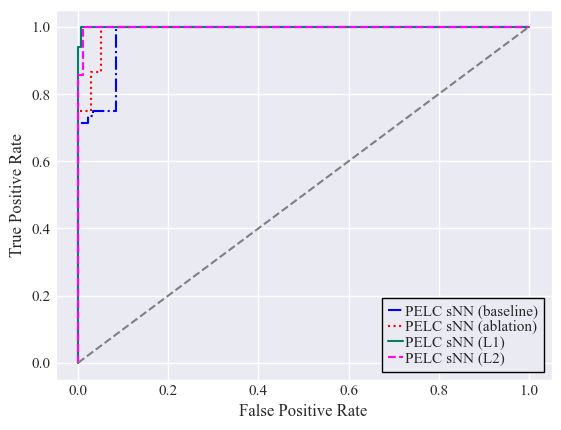

In [40]:
# df_auc_method_list = [df_vm, 
# df_sp_bl,
# df_cd_bl,
# df_gn_bl,

# df_sp_ab,
# df_cd_ab,
# df_gn_ab,

# df_sp_l1,
# df_cd_l1,
# df_gn_l1,

# df_sp_l2,
# df_cd_l2,
# df_gn_l2]

# # baseline: cm_04, ablation: cm3, L1: cm2, L2: cm1
# cm_01 = plt.get_cmap("spring")
# cm_02 = plt.get_cmap("summer")
# cm_03 = plt.get_cmap("autumn")
# cm_04 = plt.get_cmap("winter")
# color_list = ["grey", cm_04(0),cm_04(2),cm_04(4),cm_03(0),cm_03(2),cm_03(4),cm_02(0),cm_02(2),cm_02(4),cm_01(0),cm_01(2),cm_01(4)]
# label_list = ["VAR-LiNGAM","PELC sNN (baseline)", "PELC cNN (baseline)","PELC cGAN (baseline)",
#              "PELC sNN (ablation)", "PELC cNN (ablation)","PELC cGAN (ablation)",
#              "PELC sNN (L1)", "PELC cNN (L1)","PELC cGAN (L1)",
#              "PELC sNN (L2)", "PELC cNN (L2)","PELC cGAN (L2)"]

df_auc_method_list = [df_sp_bl,df_sp_ab,df_sp_l1,df_sp_l2]
color_list = [cm_04(0),cm_03(0),cm_02(0),cm_01(0)]
label_list = ["PELC sNN (baseline)",
             "PELC sNN (ablation)",
             "PELC sNN (L1)", 
             "PELC sNN (L2)"]
linestyle_list = ["-.","dotted","solid","dashed"]

for method_arg in range(len(df_auc_method_list)):
    df_auc = df_auc_method_list[method_arg]
    FPR_list = []
    for num_of_var in range(2,len(df_auc)+2):
        Accuracy, Precision, Recall, Metric2 = Extract_Metric(df_auc,num_of_var)
        FPR_list.append(FPR_calc(Accuracy, Precision, Recall, Metric2))

    Recall_list = list(df_auc["Recall"].values)

    FPR_list2, Recall_list2 = [],[]
    for i in range(len(FPR_list)):
        if np.isnan(Recall_list[i]) or np.isnan(FPR_list[i]):
            pass
        else:
            FPR_list2.append(FPR_list[i])
            Recall_list2.append(Recall_list[i])

    FPR_list, Recall_list = FPR_list2, Recall_list2
    FPR_list.append(0.0)
    Recall_list.append(0.0)
    FPR_list.append(1.0)
    Recall_list.append(1.0)

    df_auc2 = pd.DataFrame({
        "FPR": FPR_list,
        "Recall" : Recall_list
    }).sort_values(["FPR","Recall"]).reset_index()
    del df_auc2["index"]

    df_auc2_xlist = [0.0]
    df_auc2_ylist = [0.0]
    tmp = 0.0
    for i in range(len(df_auc2)):
        if df_auc2["FPR"][i] >= df_auc2_xlist[-1] and df_auc2["Recall"][i] >= df_auc2_ylist[-1]:
            df_auc2_xlist.append(tmp)
            df_auc2_ylist.append(df_auc2["Recall"][i])
            df_auc2_xlist.append(df_auc2["FPR"][i])
            df_auc2_ylist.append(df_auc2["Recall"][i])
            tmp = df_auc2["FPR"][i]

    plt.plot(df_auc2_xlist,df_auc2_ylist, color=color_list[method_arg], label=label_list[method_arg], linestyle = linestyle_list[method_arg])
    
plt.plot(np.linspace(0.0,1.0,11),np.linspace(0.0,1.0,11),linestyle="dashed",color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

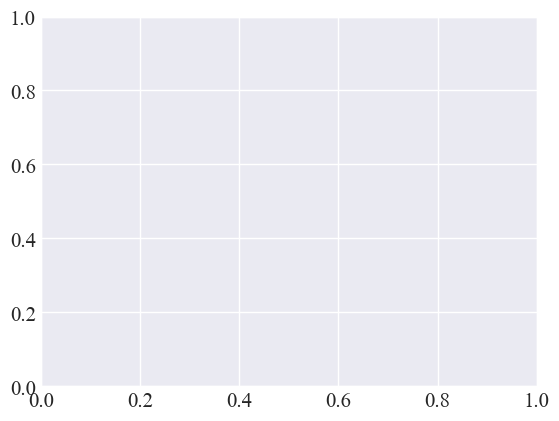

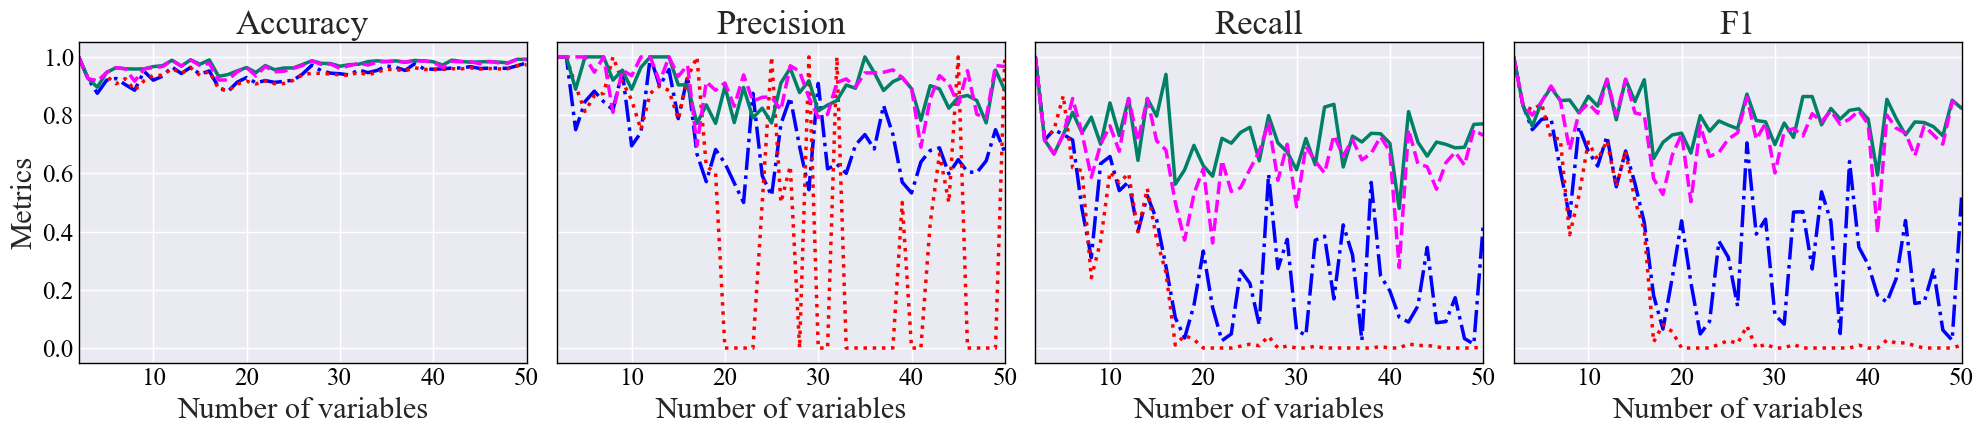

In [94]:
sns.set(style="darkgrid", palette="muted", color_codes=True) 
# plt.rcParams['font.family']='DejaVu Sans'
# plt.rcParams['font.sans-serif']='Microsoft Sans Serif'
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['font.size']=14
plt.rcParams['xtick.major.width']=1.0
plt.rcParams['ytick.major.width']=1.0
plt.rcParams['axes.linewidth']=1.0

# plt.rcParams['font.family'] = 'DejaVu Sans' # font familyの設定 
plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定 stix
plt.rcParams["font.size"] = 14 # 全体のフォントサイズが変更されます。
plt.rcParams['xtick.labelsize'] = 11 # 軸だけ変更されます。
plt.rcParams['ytick.labelsize'] = 11 # 軸だけ変更されます
# plt.rcParams['axes.grid'] = True # make grid
plt.rcParams["legend.fancybox"] = False # 丸角
plt.rcParams["legend.framealpha"] = 1 # 透明度の指定、0で塗りつぶしなし
plt.rcParams["legend.edgecolor"] = 'black' # edgeの色を変更
plt.rcParams["legend.handlelength"] = 1 # 凡例の線の長さを調節
plt.rcParams["legend.labelspacing"] = 0.1 # 垂直方向（縦）の距離の各凡例の距離
plt.rcParams["legend.handletextpad"] = 0.1 # 凡例の線と文字の距離の長さ
# plt.rcParams["legend.markerscale"] = 2 # 点がある場合のmarker scale
# plt.style.use('seaborn-colorblind')
# sns.heatmap(df4,cmap="cividis")
# plt.savefig('/content/drive/MyDrive/210713_cormat.eps', bbox_inches="tight", pad_inches=0.05,dpi=350) 
# plt.show()

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams["font.family"] = "Times New Roman"   # 使用するフォント
plt.rcParams["font.size"] = 12                # 文字の大きさ
plt.tick_params(labelsize = 15) 
# cm = plt.get_cmap("Spectral")
cm_01 = plt.get_cmap("spring")
cm_02 = plt.get_cmap("summer")
cm_03 = plt.get_cmap("autumn")
cm_04 = plt.get_cmap("winter")
# plt.rcParams["font.size"] = 10
# plt.xlabel("Time (arbitrary unit)")
# plt.ylabel(r"$X(t)$",rotation=0)
spines = 1.0
fig = plt.figure(figsize = (20,4.5), tight_layout=True)
ax_dict = dict()
Metric_list = ["Accuracy","Precision","Recall","F1"] # ["Time","DTW_mean","AUC","Legend_area"] 

hhh = 1
for Metric in Metric_list:
    ax_dict[Metric] = fig.add_subplot(1, 4, hhh)
    hhh +=1
    
for Metric in Metric_list:
    if Metric == "AUC"  or Metric =="Legend_area":
        pass
    else:
        # ax2 = ax1.twinx()
        # 2軸グラフの本体設定
        ax_dict[Metric].plot(df_sp_bl["Num_of_var"], df_sp_bl[Metric],
                color = cm_04(0), label="PELC sNN (baseline)", linewidth=2.5, linestyle="-.") # cm.Set2.colors[0] #marker='o', markersize=8
    #     ax_dict[Metric].plot(df21["Num_of_var"], df_cd_bl[Metric],
    #             color = "blue", label="PELC cNN (baseline)", linewidth=2.5, linestyle="dashed", marker='s', markersize=8, markerfacecolor="lightblue",markeredgewidth=1, markeredgecolor="blue")
    #     ax_dict[Metric].plot(df22["Num_of_var"], df_gn_bl[Metric],
    #             color = "blue", label="PELC cGAN (baseline)", linewidth=2.5, linestyle="dotted", marker='^', markersize=9, markerfacecolor="lightblue",markeredgewidth=1, markeredgecolor="blue")

        ax_dict[Metric].plot(df_sp_ab["Num_of_var"], df_sp_ab[Metric],
                color = cm_03(0), label="PELC sNN (ablation)", linewidth=2.5, linestyle="dotted") # cm.Set2.colors[0] #marker='o', markersize=8, 
        # ax1.plot(df21["Num_of_var"], df_cd_ab[Metric],
        #         color = cm_02(2/8), label="PELC cNN ablation", linewidth=2.5, linestyle="dashed", marker='s', markersize=8, markerfacecolor="w")
        # ax1.plot(df22["Num_of_var"], df_gn_ab[Metric],
        #         color = cm_02(3/8), label="PELC cGAN ablation", linewidth=2.5, linestyle="dotted", marker='^', markersize=9, markerfacecolor="w")

        ax_dict[Metric].plot(df_sp_l1["Num_of_var"], df_sp_l1[Metric],
                color = cm_02(0), label="PELC sNN (L1)", linewidth=2.5, linestyle="solid") # cm.Set2.colors[0] # marker='o', markersize=8,
        # ax1.plot(df21["Num_of_var"], df_cd_l1[Metric],
        #         color = cm_03(2/8), label="PELC cNN L1", linewidth=2.5, linestyle="dashed", marker='s', markersize=8, markerfacecolor="w")
        # ax1.plot(df22["Num_of_var"], df_gn_l1[Metric],
        #         color = cm_03(3/8), label="PELC cGAN L1", linewidth=2.5, linestyle="dotted", marker='^', markersize=9, markerfacecolor="w")

        ax_dict[Metric].plot(df_sp_l2["Num_of_var"], df_sp_l2[Metric],
                color = cm_01(0), label="PELC sNN (L2)", linewidth=2.5, linestyle="dashed") # cm.Set2.colors[0] #marker='o', markersize=8, 
        # ax1.plot(df21["Num_of_var"], df_cd_l2[Metric],
        #         color = cm_04(2/8), label="PELC cNN L2", linewidth=2.5, linestyle="dashed", marker='s', markersize=8, markerfacecolor="w")
        # ax1.plot(df22["Num_of_var"], df_gn_l2[Metric],
        #         color = cm_04(3/8), label="PELC cGAN L2", linewidth=2.5, linestyle="dotted", marker='^', markersize=9, markerfacecolor="w")

    #     ax_dict[Metric].plot(df22["Num_of_var"], df_vm[Metric],
    #             color = 'black', label="VAR-LiNGAM", linewidth=2.5, linestyle="-", marker='D', markersize=9, markerfacecolor="grey",markeredgewidth=1, markeredgecolor="black")

    #     ax_dict[Metric].xaxis.set_major_locator(MaxNLocator(integer=True)) # 目盛りを整数にする
        # ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
        # ax1.set_xticks(np.linspace(2,len(df6)+1,len(df6)-2+1+1))
        
    if Metric == "Time":
        ax_dict[Metric].set_ylabel("Run time (sec.)",fontsize=25)
    elif Metric == "DTW_mean":
        ax_dict[Metric].set_ylabel("DTW avg.",fontsize=25)
    elif Metric == "Legend_area":
        pass
    else:   
        ax_dict[Metric].set_title(Metric,fontsize=25)
        if Metric == "Accuracy":
            ax_dict[Metric].set_ylabel("Metrics",fontsize=22)
        else:
            ax_dict[Metric].yaxis.set_ticklabels([])

    plt.tick_params(labelsize = 18) #目盛線ラベルのフォントサイズ
    if Metric != "Legend_area":
        ax_dict[Metric].set_xlabel('Number of variables',fontsize=22)
    ax_dict[Metric].tick_params(labelsize = 18) 
    # ax2.tick_params(labelsize = 15) 
    ax_dict[Metric].spines["top"].set_linewidth(spines)
    ax_dict[Metric].spines["left"].set_linewidth(spines)
    ax_dict[Metric].spines["bottom"].set_linewidth(spines)
    ax_dict[Metric].spines["right"].set_linewidth(spines)
    ax_dict[Metric].spines["top"].set_color("black")
    ax_dict[Metric].spines["left"].set_color("black")
    ax_dict[Metric].spines["bottom"].set_color("black")
    ax_dict[Metric].spines["right"].set_color("black")
    ax_dict[Metric].tick_params(direction = "in", length = 3, colors = "black")
    ax_dict[Metric].tick_params(axis="x",which='major', length=5)
    
    ax_dict[Metric].grid(True)
    if Metric == "DTW_mean" or Metric == "Time" or Metric == "AUC" or Metric == "Legend_area":
        pass
    else:
        ax_dict[Metric].set_ylim([-0.05,1.05])
        
    ax_dict[Metric].set_xlim([2,50])
#     plt.ylim([2,50])

#################################################################################
    if Metric == "AUC":
        df_auc_method_list = [df_sp_bl,df_sp_ab,df_sp_l1,df_sp_l2]
        color_list = [cm_04(0),cm_03(0),cm_02(0),cm_01(0)]
        label_list = ["PELC sNN (baseline)",
                     "PELC sNN (ablation)",
                     "PELC sNN (L1)", 
                     "PELC sNN (L2)"]
        linestyle_list = ["-.","dotted","solid","dashed"]

        for method_arg in range(len(df_auc_method_list)):
            df_auc = df_auc_method_list[method_arg]
            FPR_list = []
            for num_of_var in range(2,len(df_auc)+2):
                Accuracy, Precision, Recall, Metric2 = Extract_Metric(df_auc,num_of_var)
                FPR_list.append(FPR_calc(Accuracy, Precision, Recall, Metric2))

            Recall_list = list(df_auc["Recall"].values)

            FPR_list2, Recall_list2 = [],[]
            for i in range(len(FPR_list)):
                if np.isnan(Recall_list[i]) or np.isnan(FPR_list[i]):
                    pass
                else:
                    FPR_list2.append(FPR_list[i])
                    Recall_list2.append(Recall_list[i])

            FPR_list, Recall_list = FPR_list2, Recall_list2
            FPR_list.append(0.0)
            Recall_list.append(0.0)
            FPR_list.append(1.0)
            Recall_list.append(1.0)

            df_auc2 = pd.DataFrame({
                "FPR": FPR_list,
                "Recall" : Recall_list
            }).sort_values(["FPR","Recall"]).reset_index()
            del df_auc2["index"]

            df_auc2_xlist = [0.0]
            df_auc2_ylist = [0.0]
            tmp = 0.0
            for i in range(len(df_auc2)):
                if df_auc2["FPR"][i] >= df_auc2_xlist[-1] and df_auc2["Recall"][i] >= df_auc2_ylist[-1]:
                    df_auc2_xlist.append(tmp)
                    df_auc2_ylist.append(df_auc2["Recall"][i])
                    df_auc2_xlist.append(df_auc2["FPR"][i])
                    df_auc2_ylist.append(df_auc2["Recall"][i])
                    tmp = df_auc2["FPR"][i]

            plt.tick_params(labelsize = 18) #目盛線ラベルのフォントサイズ

            ax_dict[Metric].set_xlabel('False Positive Rate',fontsize=25)
            ax_dict[Metric].set_ylabel('True Positive Rate',fontsize=25)
            ax_dict[Metric].tick_params(labelsize = 18) 
            # ax2.tick_params(labelsize = 15) 
            ax_dict[Metric].spines["top"].set_linewidth(spines)
            ax_dict[Metric].spines["left"].set_linewidth(spines)
            ax_dict[Metric].spines["bottom"].set_linewidth(spines)
            ax_dict[Metric].spines["right"].set_linewidth(spines)
            ax_dict[Metric].spines["top"].set_color("black")
            ax_dict[Metric].spines["left"].set_color("black")
            ax_dict[Metric].spines["bottom"].set_color("black")
            ax_dict[Metric].spines["right"].set_color("black")
            ax_dict[Metric].tick_params(direction = "in", length = 3, colors = "black")
            ax_dict[Metric].tick_params(axis="x",which='major', length=5)

            ax_dict[Metric].set_ylim([-0.05,1.05])
            ax_dict[Metric].set_xlim([-0.05,1.05])

            ax_dict[Metric].plot(df_auc2_xlist,df_auc2_ylist, linewidth=2.5, color=color_list[method_arg], label=label_list[method_arg], linestyle = linestyle_list[method_arg])

        ax_dict[Metric].plot(np.linspace(0.0,1.0,11),np.linspace(0.0,1.0,11),linestyle="dashed",color="grey")
    elif Metric == "Legend_area":
        sns.set(style="whitegrid", palette="muted", color_codes=True) 
        ax_dict[Metric].set_facecolor("white")
        plt.rcParams["font.family"] = "Times New Roman"
        ax_dict[Metric].plot([1,0.9],[1,0.9],
                color = cm_04(0), label="PELC sNN (baseline)", linewidth=2.5, linestyle="-.") 
        ax_dict[Metric].plot([1,0.9],[1,0.9],
                color = cm_03(0), label="PELC sNN (ablation)", linewidth=2.5, linestyle="dotted")
        ax_dict[Metric].plot([1,0.9],[1,0.9],
                color = cm_02(0), label="PELC sNN (L1)", linewidth=2.5, linestyle="solid")
        ax_dict[Metric].plot([1,0.9],[1,0.9],
                color = cm_01(0), label="PELC sNN (L2)", linewidth=2.5, linestyle="dashed")
        ax_dict[Metric].spines["top"].set_visible(False)
        ax_dict[Metric].spines["bottom"].set_visible(False)
        ax_dict[Metric].spines["right"].set_visible(False)
        ax_dict[Metric].spines["left"].set_visible(False)
        ax_dict[Metric].grid(False)
        ax_dict[Metric].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, bottom=False, left=False, right=False, top=False)
        plt.legend(fontsize=25,bbox_to_anchor=(-0.1, 1), loc='upper left')

    else:
        pass

##################################################################################
# 凡例の表示のため、handler1と2にはグラフオブジェクトのリスト情報が入る
# label1と2には、凡例用に各labelのリスト情報が入る
handler1, label1 = ax_dict["F1"].get_legend_handles_labels()
# handler2, label2 = ax2.get_legend_handles_labels()
# 凡例をまとめて出力する
# ax1.legend(handler1 + handler2, label1 + label2,  borderaxespad=0.5, fontsize=14) # loc='upper left', bbox_to_anchor=(1.1, 1),

# l = fig.legend(handler1 , label1 ,  borderaxespad=0.5, fontsize=18, bbox_to_anchor=(0.5, -0.05), loc='lower center', ncol=4) # loc="upper right" 

# plt.savefig("C:/Users/Mitsu/Desktop/AISTATS/231002_Results/231007_Scalability_plot__A.png", bbox_inches='tight')
# plt.savefig("C:/Users/Mitsu/Desktop/AISTATS/231002_Results/231007_Scalability_plot__A.svg", bbox_inches='tight')
# plt.savefig("C:/Users/Mitsu/Desktop/AISTATS/231002_Results/231007_Scalability_plot__A.eps", bbox_inches='tight')
# plt.savefig("C:/Users/Mitsu/Desktop/AISTATS/231002_Results/231007_Scalability_plot_dpi300__A.png", bbox_inches='tight',dpi=300)
# plt.savefig("C:/Users/Mitsu/Desktop/AISTATS/231002_Results/231007_Scalability_plot_dpi300__A.svg", bbox_inches='tight',dpi=300)
# plt.savefig("C:/Users/Mitsu/Desktop/AISTATS/231002_Results/231007_Scalability_plot_dpi300__A.eps", bbox_inches='tight',dpi=300)